In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Implementation, check and test of the analytical expressions for Discrete and Averaged Discrete GFs

In [26]:
from em_statics import discrete_green_function, average_discrete_green_function, green_function


xc = np.linspace(0, 2, 100)
yc = 0
zc = 0

Gamma_x = discrete_green_function(xc, yc, zc, a=1, b=1)
Psi_x = average_discrete_green_function(xc, yc, zc, a=1, b=1)
G_x = green_function(xc, yc, zc)

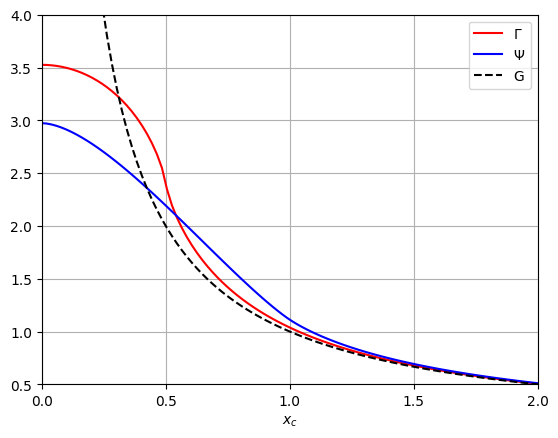

In [27]:
# Fig 3a
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()

ax.plot(xc, Gamma_x, 'r-', label="$\Gamma$")
ax.plot(xc, Psi_x, 'b-', label="$\Psi$")
ax.plot(xc, G_x, 'k--', label="G")

ax.set_xlim([0,2])
ax.set_ylim([0.5, 4])
ax.set_xlabel("$x_c$")
ax.set_xticks([0, 0.5, 1, 1.5, 2])
ax.grid()
ax.legend()

In [28]:
xc = 0
yc = 0
zc = np.linspace(0, 2, 100)

Gamma_z = discrete_green_function(xc, yc, zc, a=1, b=1)
Psi_z = average_discrete_green_function(xc, yc, zc, a=1, b=1)
G_z = green_function(xc, yc, zc)

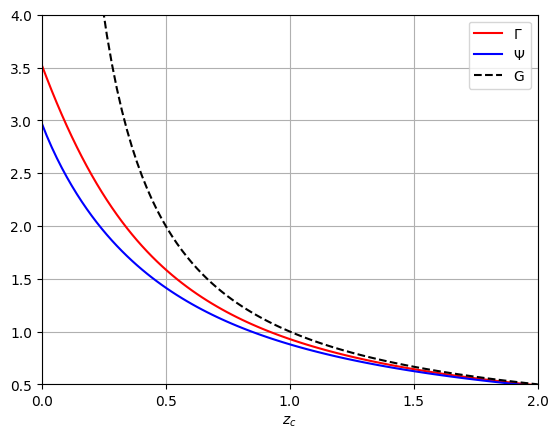

In [29]:
# Fig 3b

import matplotlib.pyplot as plt 

fig, ax = plt.subplots()

ax.plot(zc, Gamma_z, 'r-', label="$\Gamma$")
ax.plot(zc, Psi_z, 'b-', label="$\Psi$")
ax.plot(zc, G_z, 'k--', label="G")

ax.set_xlim([0,2])
ax.set_ylim([0.5, 4])
ax.set_xlabel("$z_c$")
ax.set_xticks([0, 0.5, 1, 1.5, 2])
ax.grid()
ax.legend()

## Single plate at constant potential


In [ ]:
from em_statics import  run_static_plate
run_static_plate()

## Trials with symbolic integration

In [ ]:
import sympy as sp

# Define symbols
u, v, h = sp.symbols('u v h')

# Define the expression
expression = 1 / sp.sqrt(u**2 + v**2 + h**2)

# Integrate the expression
integral_result_u = sp.integrate(expression, u)
integral_result_uv = sp.integrate(integral_result_u, v) #, (u, -sp.oo, sp.oo), (v, -sp.oo, sp.oo))

print(f"{integral_result_uv=}")
# Rewrite the result in terms of arcsinh and arctan
integral_result_rewritten = integral_result_uv.rewrite(sp.asinh).rewrite(sp.atan)

print("Integral Result (Rewritten):")
print(integral_result_rewritten)


